In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import gradient_descent_v2
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [137]:
df = pd.read_pickle('training_data.pkl')
X_train = df['X_train']
y_train = df['y_train']
y_train = y_train.astype('uint8')
X_train = np.array(X_train.tolist())
y_train = np.array(y_train.tolist())

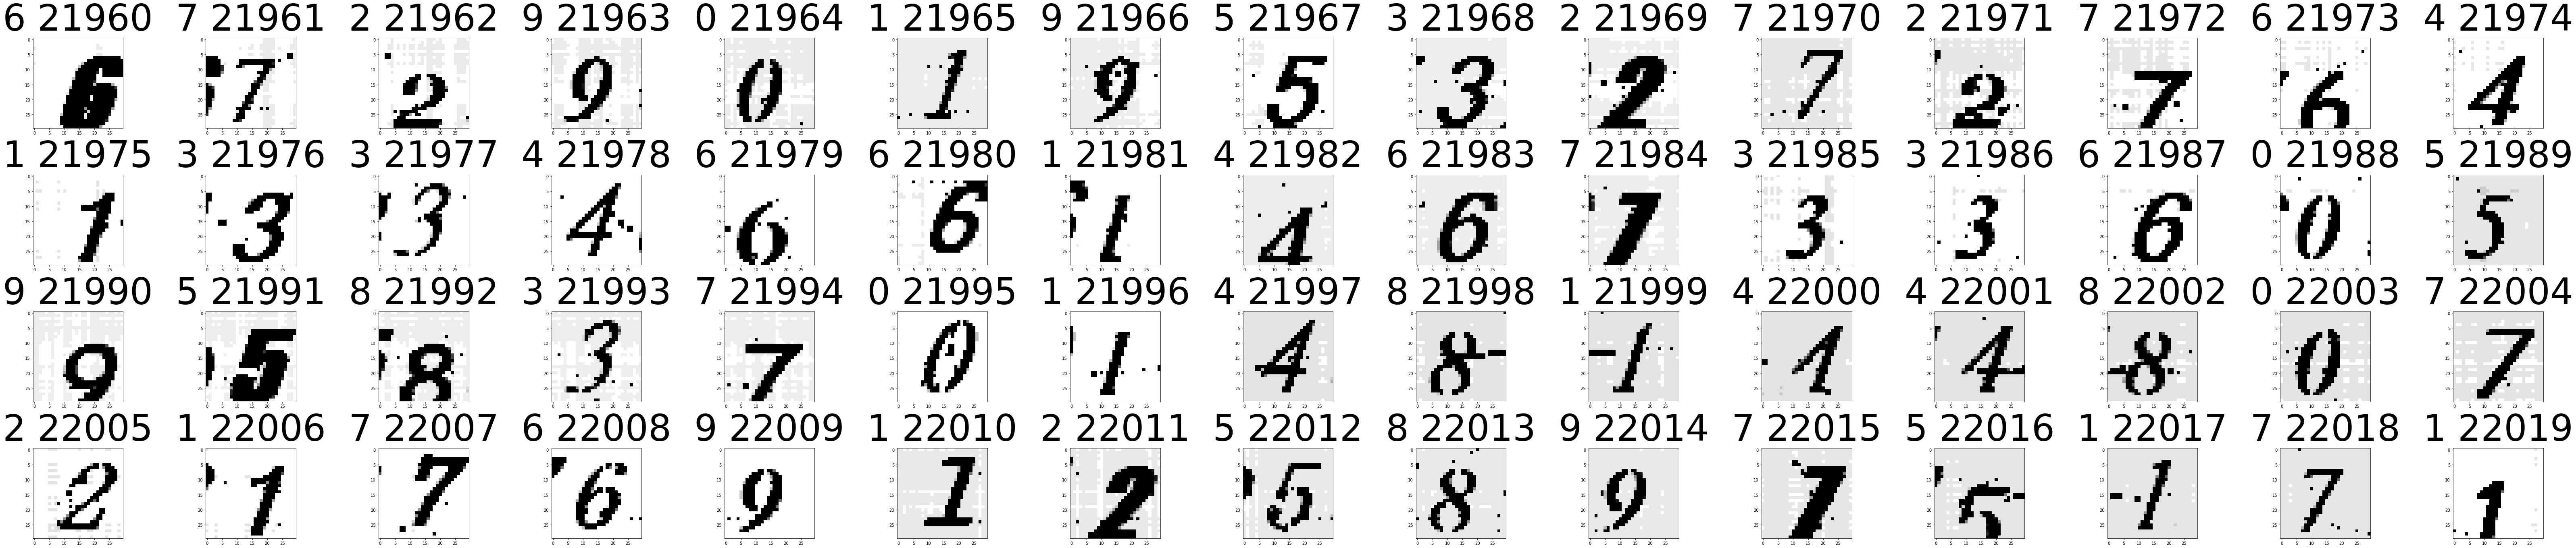

In [138]:
plt.figure(figsize=(90, 19)) #印出60張圖片及其標籤
for i in range(60):
    plt.subplot(4, 15, i+1)
    num = 21960
    plt.imshow(X_train[num+i], cmap='gray')
    plt.title(f'label={y_train[num+i]}', fontsize=90)
plt.tight_layout()

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [140]:
X_train = X_train.reshape(len(X_train), 30, 30, 1)
X_test = X_test.reshape(len(X_test), 30, 30, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [141]:
model = Sequential()
model.add(Conv2D(32, 3, 3, padding='same', input_shape = (30, 30, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, 3, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Activation('relu'))
model.add((Dense(300)))
model.add(Activation('relu'))
model.add((Dense(500)))
model.add(Activation('relu'))
model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse', optimizer=gradient_descent_v2.SGD(learning_rate=0.05),
             metrics=['accuracy'])

In [142]:
model.fit(X_train, y_train, batch_size=150, epochs=15)#訓練第一次

Epoch 1/15


2023-03-12 14:20:49.525579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 3s 18ms/step - loss: 0.0901 - accuracy: 0.1136
Epoch 2/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0897 - accuracy: 0.1217
Epoch 3/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0896 - accuracy: 0.1370
Epoch 4/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0894 - accuracy: 0.1661
Epoch 5/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0893 - accuracy: 0.1730
Epoch 6/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0891 - accuracy: 0.1749
Epoch 7/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0890 - accuracy: 0.2202
Epoch 8/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0888 - accuracy: 0.2030
Epoch 9/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0887 - accuracy: 0.2281
Epoch 10/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0884 - accuracy: 0.2258


In [143]:
pred = model.predict_classes(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2023-03-12 14:21:16.996466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## 準確率3成時，印出測試資料前60張圖片

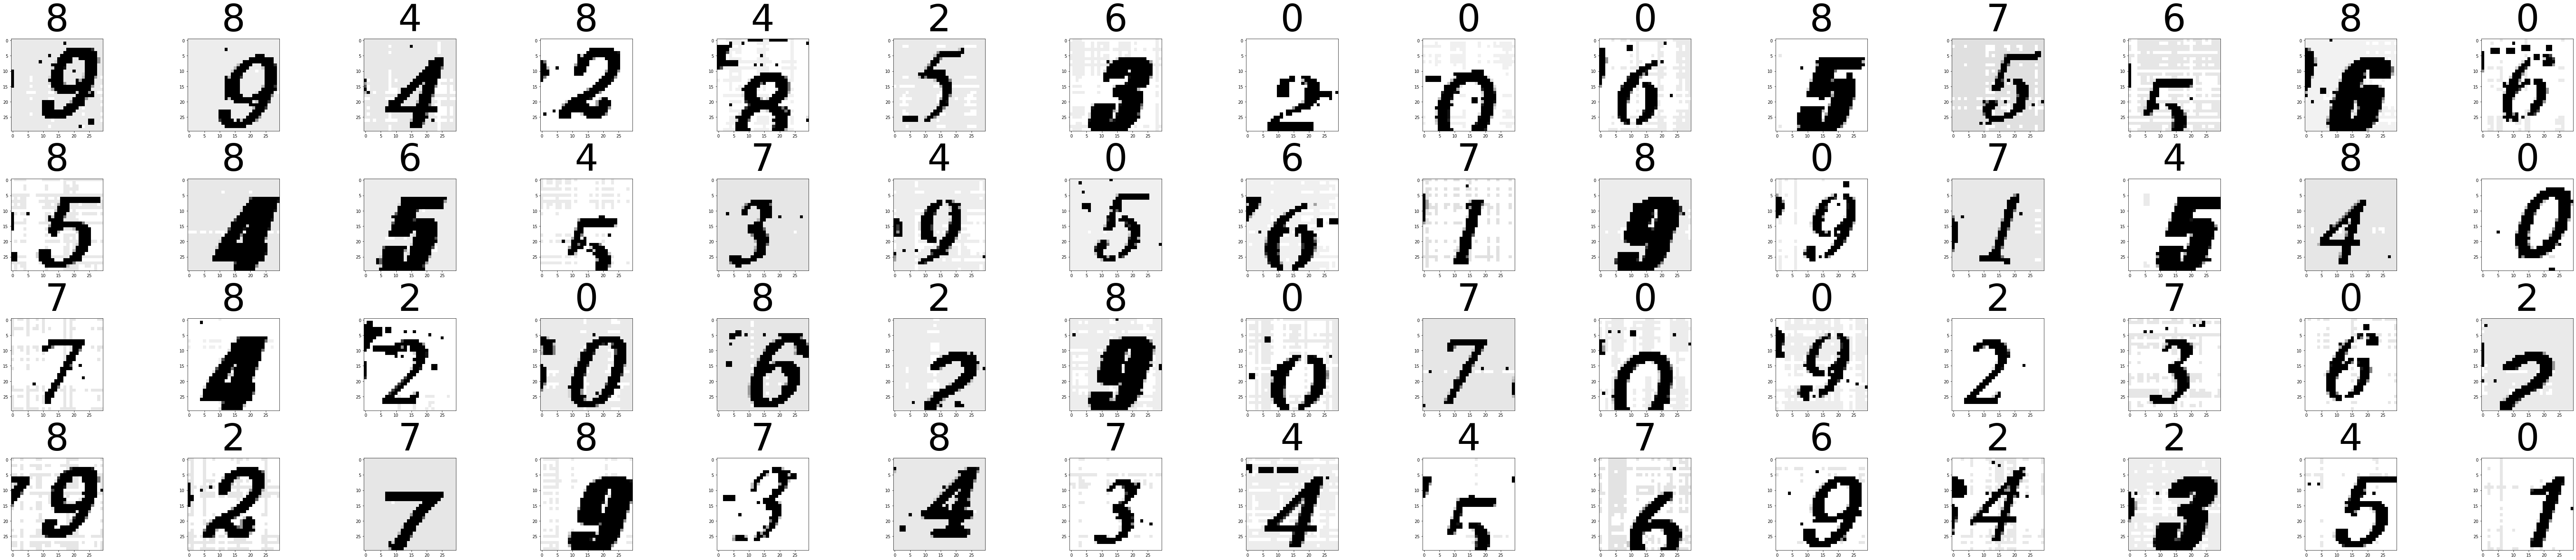

In [144]:
plt.figure(figsize=(90, 19))
for i in range(60):
    plt.subplot(4, 15, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'{pred[i]}', fontsize=90)
plt.tight_layout()

## 第二到第八次訓練

In [145]:
for i in range(1, 8):
    print(f'==================第{i+1}次訓練===================')
    model.fit(X_train, y_train, batch_size=150, epochs=15)

==================第2次訓練===================
Epoch 1/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0858 - accuracy: 0.3360
Epoch 2/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0850 - accuracy: 0.3440
Epoch 3/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0838 - accuracy: 0.3601
Epoch 4/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0823 - accuracy: 0.3803
Epoch 5/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0805 - accuracy: 0.3999
Epoch 6/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0782 - accuracy: 0.4201
Epoch 7/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0757 - accuracy: 0.4419
Epoch 8/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0727 - accuracy: 0.4672
Epoch 9/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0702 - accuracy: 0.4874
Epoch 10/15
109/109 [===========================

In [146]:
model.evaluate(X_test, y_test)
pred = model.predict_classes(X_test)

  6/218 [..............................] - ETA: 2s - loss: 9.5106e-04 - accuracy: 0.9948

2023-03-12 14:24:36.419154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


218/218 [==============================] - 2s 6ms/step - loss: 0.0016 - accuracy: 0.9905


## 最後印出測試資料前60張圖片，只有一張圖片預測錯誤

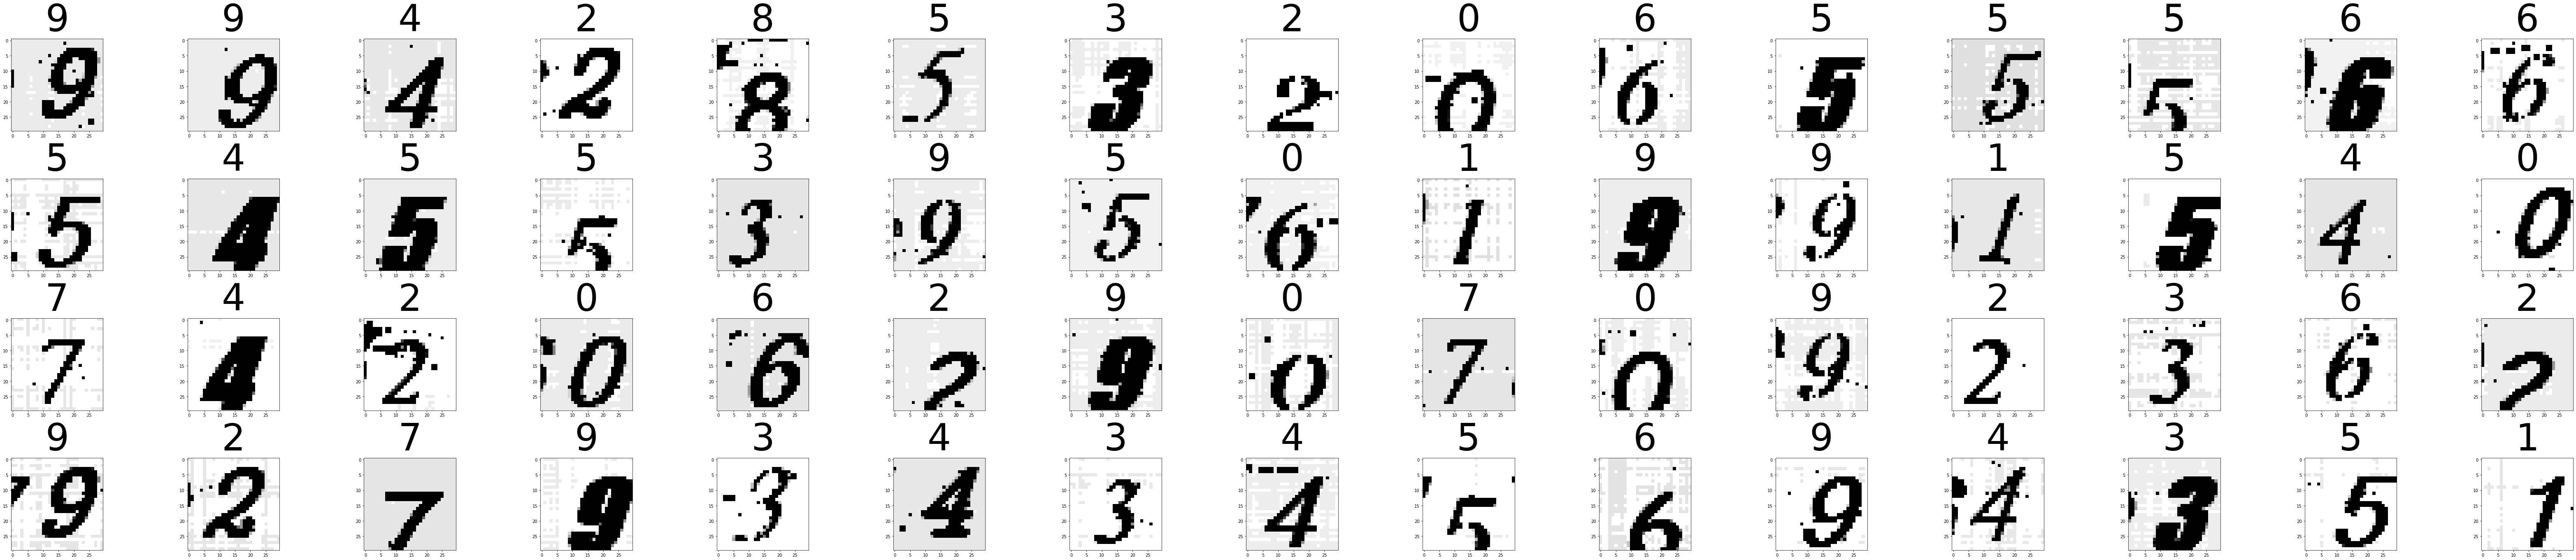

In [147]:
plt.figure(figsize=(90, 19))
for i in range(60):
    plt.subplot(4, 15, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'{pred[i]}', fontsize=90)
plt.tight_layout()

In [148]:
model.save('./cnn_model.h5')